# Telecom Churn
## Task:
## 1. predict which customers are at high risk of churn.
## 2. identify the main indicators of churn.

Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy=True
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA

Code to filter unnecessary warnings

In [2]:
#to Suppress unnecessary warnings
warnings.filterwarnings("ignore")

Defining the path to the Dataset

In [3]:
teleDataFile=r'telecom_churn_data.csv'

Reading the Dataset

In [4]:
teleData= pd.read_csv(teleDataFile)

Finding out the number of non-null values in the dataset

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(teleData.info(verbose=True,null_counts =True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

looking into the stats of all the columns of the dataset 

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData.describe())

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

Taking a peek into the dataset

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData.head(5))

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

Finding the number of unique values in each column of the dataset

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(teleData.nunique(axis=0,dropna=False))

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  2
std_og_t2o_mou                  2
loc_ic_t2o_mou                  2
last_date_of_month_6            1
last_date_of_month_7            2
last_date_of_month_8            2
last_date_of_month_9            2
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24314
onnet_mou_7                 24337
onnet_mou_8                 24090
onnet_mou_9                 23566
offnet_mou_6                31141
offnet_mou_7                31024
offnet_mou_8                30909
offnet_mou_9                30078
roam_ic_mou_6                6513
roam_ic_mou_7                5231
roam_ic_mou_8                5316
roam_ic_mou_9                4828
roam_og_mou_6                8039
roam_og_mou_7                6640
roam_og_mou_8                6505
roam_og_mou_9                5883
loc_og_t2t_mou

we can see that there are columns with 1 or 2 unique values to as high as 82k unique values(not taking into account the mobile_number which ofcourse will have unique values) 

Printing all the unique values for columns with less then 100 unique values including null/nan:

In [9]:
for col in list(teleData.columns):
    if(teleData[col].nunique()>100 ): continue
    else:
        print(col+":"+str(teleData[col].unique().tolist()))
        print("----------------------------------------------------------------------------------")

circle_id:[109]
----------------------------------------------------------------------------------
loc_og_t2o_mou:[0.0, nan]
----------------------------------------------------------------------------------
std_og_t2o_mou:[0.0, nan]
----------------------------------------------------------------------------------
loc_ic_t2o_mou:[0.0, nan]
----------------------------------------------------------------------------------
last_date_of_month_6:['6/30/2014']
----------------------------------------------------------------------------------
last_date_of_month_7:['7/31/2014', nan]
----------------------------------------------------------------------------------
last_date_of_month_8:['8/31/2014', nan]
----------------------------------------------------------------------------------
last_date_of_month_9:['9/30/2014', nan]
----------------------------------------------------------------------------------
std_og_t2c_mou_6:[nan, 0.0]
-----------------------------------------------------------

night_pck_user_6:[0.0, nan, 1.0]
----------------------------------------------------------------------------------
night_pck_user_7:[0.0, nan, 1.0]
----------------------------------------------------------------------------------
night_pck_user_8:[0.0, nan, 1.0]
----------------------------------------------------------------------------------
night_pck_user_9:[nan, 0.0, 1.0]
----------------------------------------------------------------------------------
monthly_2g_6:[0, 1, 2, 3, 4]
----------------------------------------------------------------------------------
monthly_2g_7:[0, 1, 2, 5, 4, 3]
----------------------------------------------------------------------------------
monthly_2g_8:[0, 1, 2, 5, 3, 4]
----------------------------------------------------------------------------------
monthly_2g_9:[0, 2, 1, 3, 4]
----------------------------------------------------------------------------------
sachet_2g_6:[0, 1, 3, 4, 2, 7, 8, 12, 5, 16, 11, 6, 10, 20, 9, 18, 19, 22, 14, 13,

Finding the percentage of Null values in each column:

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (teleData.isnull().mean())

mobile_number               0.000000
circle_id                   0.000000
loc_og_t2o_mou              0.010180
std_og_t2o_mou              0.010180
loc_ic_t2o_mou              0.010180
last_date_of_month_6        0.000000
last_date_of_month_7        0.006010
last_date_of_month_8        0.011000
last_date_of_month_9        0.016590
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
arpu_9                      0.000000
onnet_mou_6                 0.039370
onnet_mou_7                 0.038590
onnet_mou_8                 0.053781
onnet_mou_9                 0.077451
offnet_mou_6                0.039370
offnet_mou_7                0.038590
offnet_mou_8                0.053781
offnet_mou_9                0.077451
roam_ic_mou_6               0.039370
roam_ic_mou_7               0.038590
roam_ic_mou_8               0.053781
roam_ic_mou_9               0.077451
roam_og_mou_6               0.039370
roam_og_mou_7               0.038590
r

WE can see that the null values are occuring in pairs. for ex: 

og_others and ic_others
1. og_others_6    --             0.039370 => ic_others_6      --           0.039370
2. og_others_7    --             0.038590 => ic_others_7      --           0.038590
3. og_others_8    --             0.053781 => ic_others_8      --           0.053781
4. og_others_9    --             0.077451 => ic_others_9      --           0.077451

Same is the case for onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou etc.

Infact all these columns are propagating the null value for the same rows. So we can safely put 0 as the missing value for these rows. 

# Exploratory Data Analysis

## Trend and Outlier detection Univariate and Multivariate Analaysis

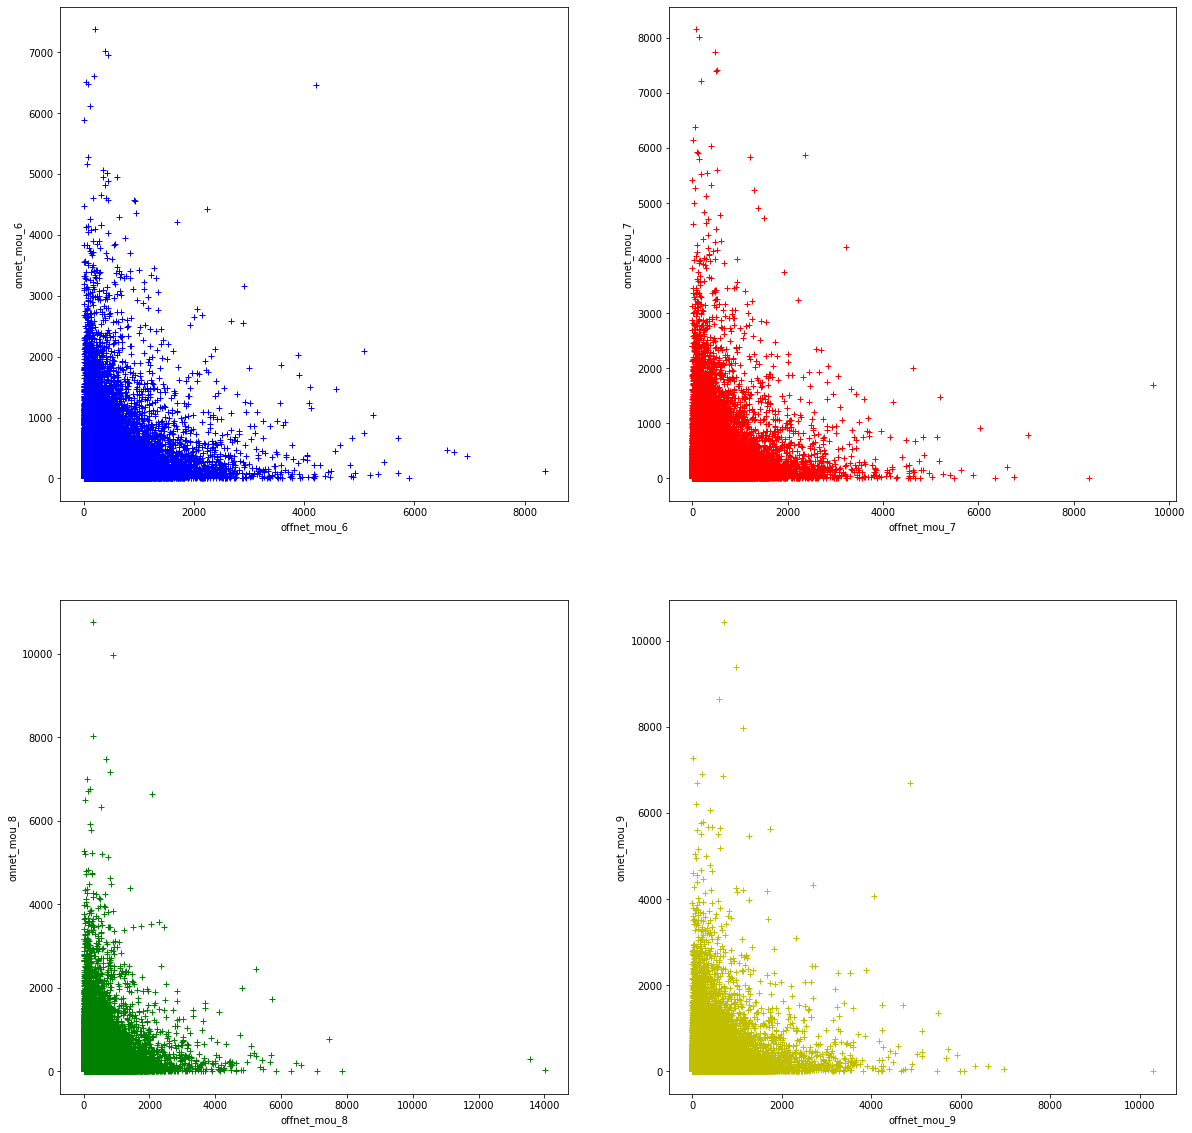

In [53]:
fig=plt.figure(figsize=(20,20))

((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['offnet_mou_6'],teleData['onnet_mou_6'],"b+")
ax1.set_xlabel("offnet_mou_6")
ax1.set_ylabel("onnet_mou_6")

ax2.plot(teleData['offnet_mou_7'],teleData['onnet_mou_7'],"r+")
ax2.set_xlabel("offnet_mou_7")
ax2.set_ylabel("onnet_mou_7")

ax3.plot(teleData['offnet_mou_8'],teleData['onnet_mou_8'],"g+")
ax3.set_xlabel("offnet_mou_8")
ax3.set_ylabel("onnet_mou_8")

ax4.plot(teleData['offnet_mou_9'],teleData['onnet_mou_9'],"y+")
ax4.set_xlabel("offnet_mou_9")
ax4.set_ylabel("onnet_mou_9")
plt.show()

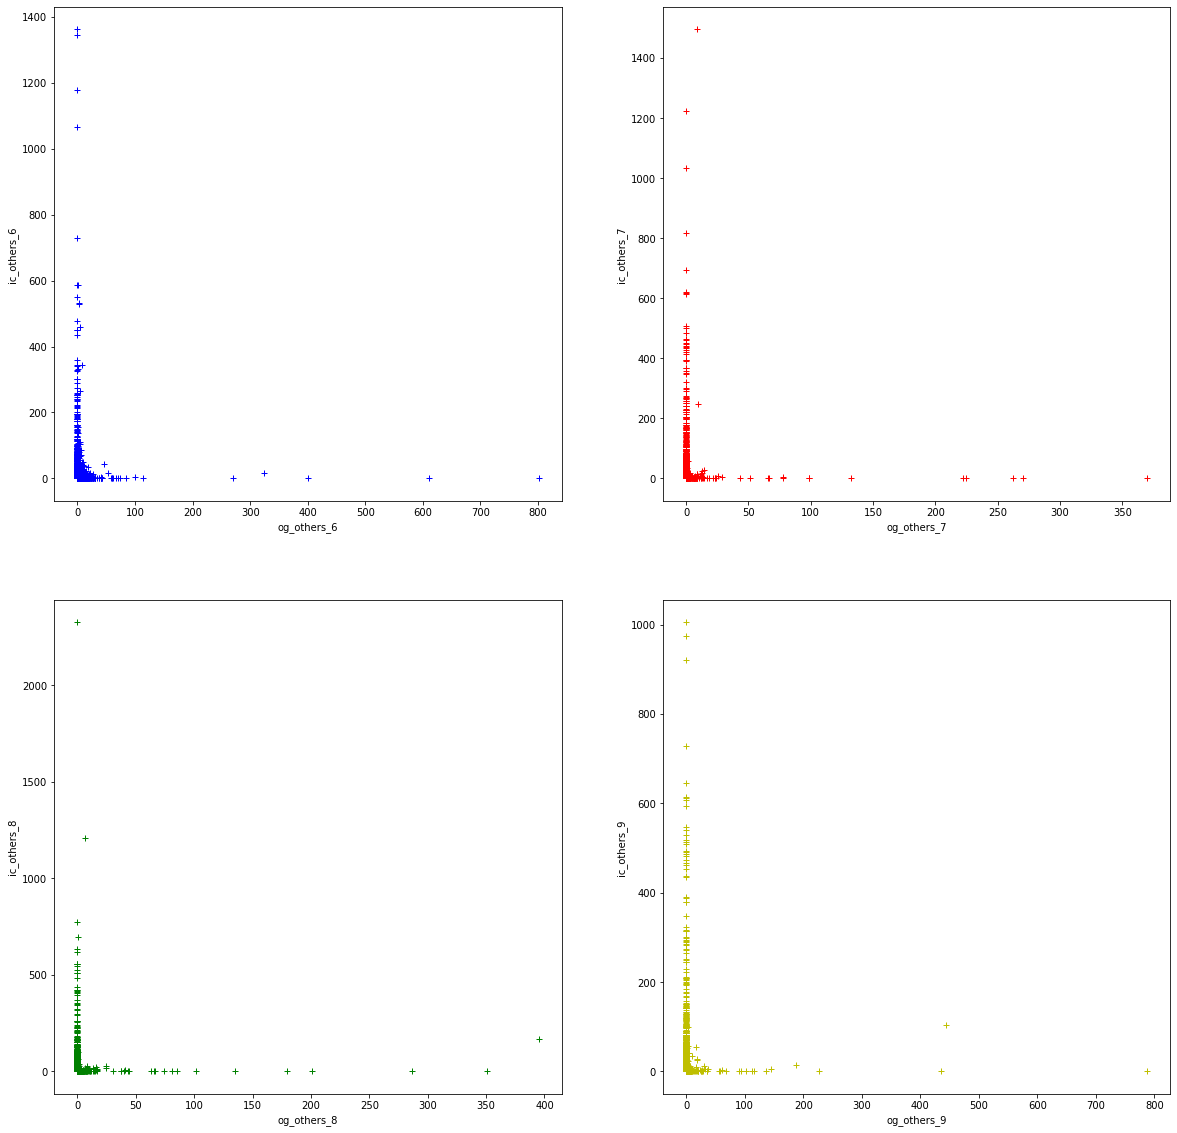

In [58]:
fig=plt.figure(figsize=(20,20))

((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['og_others_6'],teleData['ic_others_6'],"b+")
ax1.set_xlabel("og_others_6")
ax1.set_ylabel("ic_others_6")

ax2.plot(teleData['og_others_7'],teleData['ic_others_7'],"r+")
ax2.set_xlabel("og_others_7")
ax2.set_ylabel("ic_others_7")

ax3.plot(teleData['og_others_8'],teleData['ic_others_8'],"g+")
ax3.set_xlabel("og_others_8")
ax3.set_ylabel("ic_others_8")

ax4.plot(teleData['og_others_9'],teleData['ic_others_9'],"y+")
ax4.set_xlabel("og_others_9")
ax4.set_ylabel("ic_others_9")
plt.show()

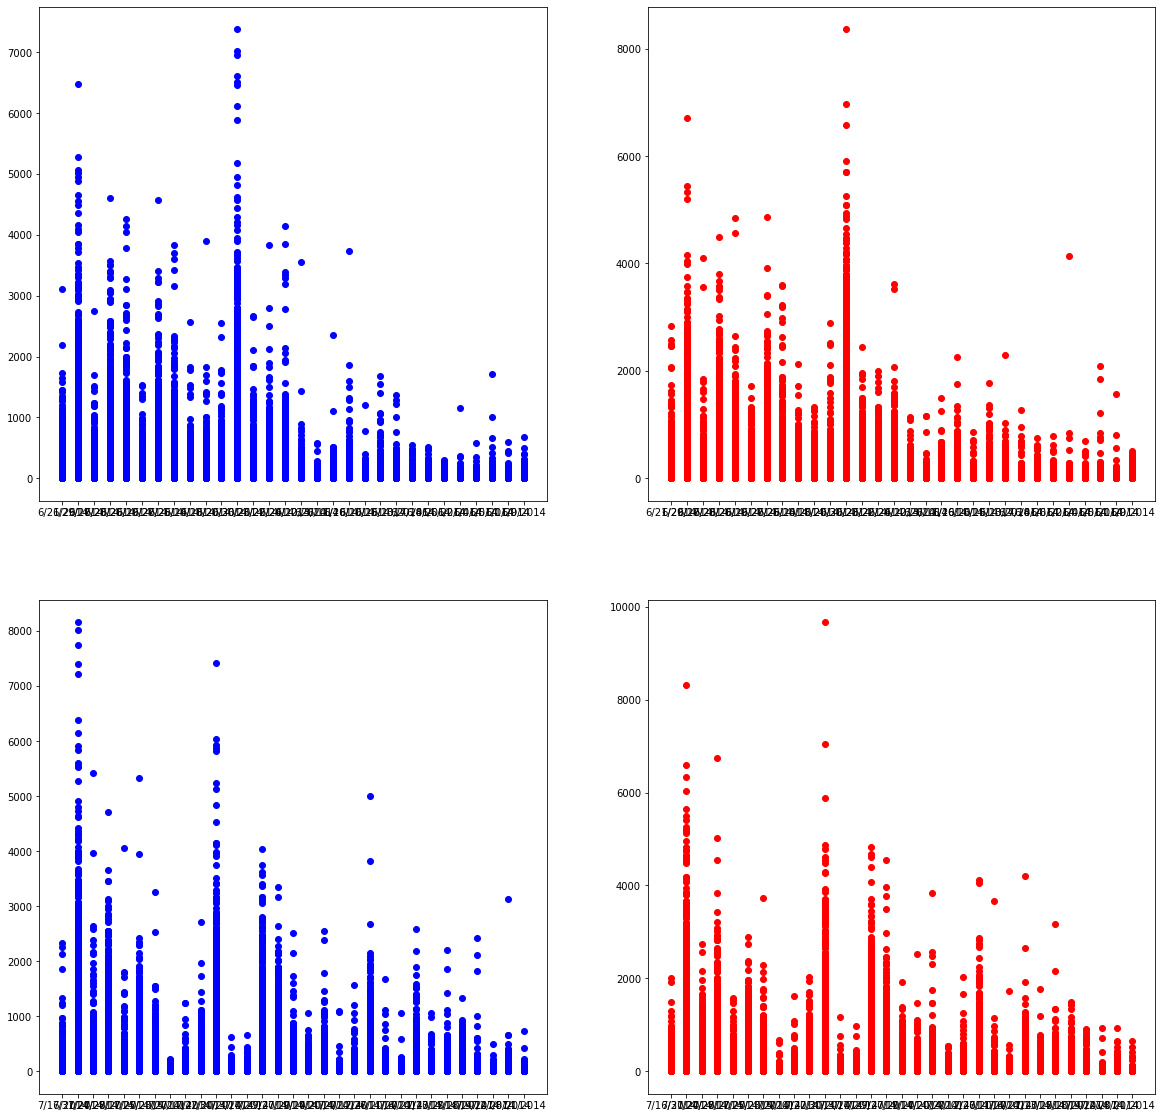

In [66]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['date_of_last_rech_6'].fillna('6/30/2014'),teleData['onnet_mou_6'],"bo")
ax2.plot(teleData['date_of_last_rech_6'].fillna('6/30/2014'),teleData['offnet_mou_6'],"ro")


ax3.plot(teleData['date_of_last_rech_7'].fillna('7/30/2014'),teleData['onnet_mou_7'],"bo")
ax4.plot(teleData['date_of_last_rech_7'].fillna('7/30/2014'),teleData['offnet_mou_7'],"ro")

plt.show()

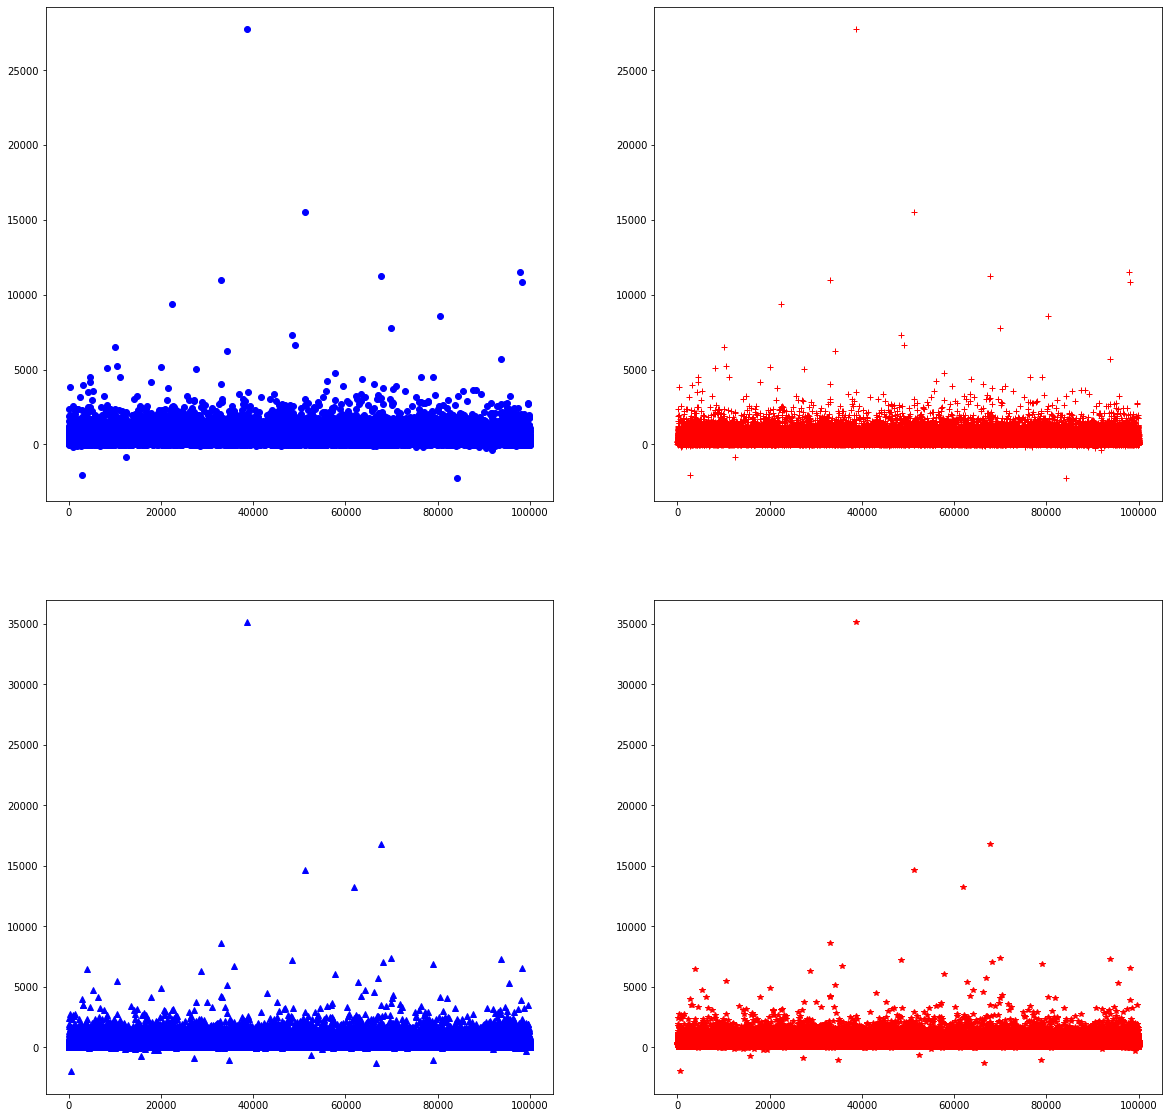

In [65]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['arpu_6'],"bo")
ax2.plot(teleData['arpu_7'],"r+")
ax3.plot(teleData['arpu_8'],"b^")
ax4.plot(teleData['arpu_9'],"r*")

plt.show()

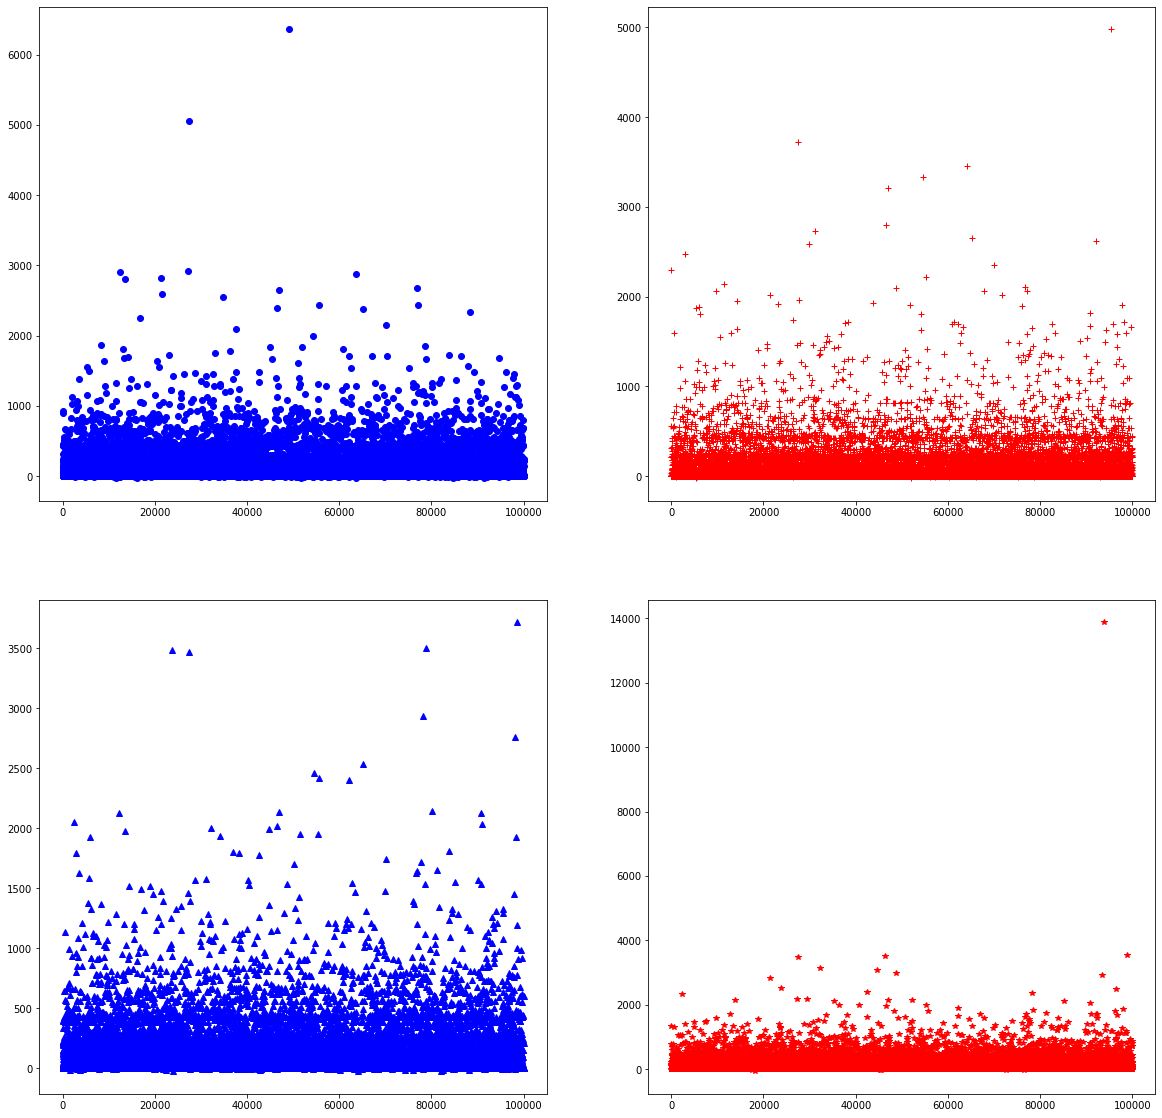

In [67]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['arpu_3g_6'],"bo")
ax2.plot(teleData['arpu_3g_7'],"r+")
ax3.plot(teleData['arpu_3g_8'],"b^")
ax4.plot(teleData['arpu_3g_9'],"r*")

plt.show()

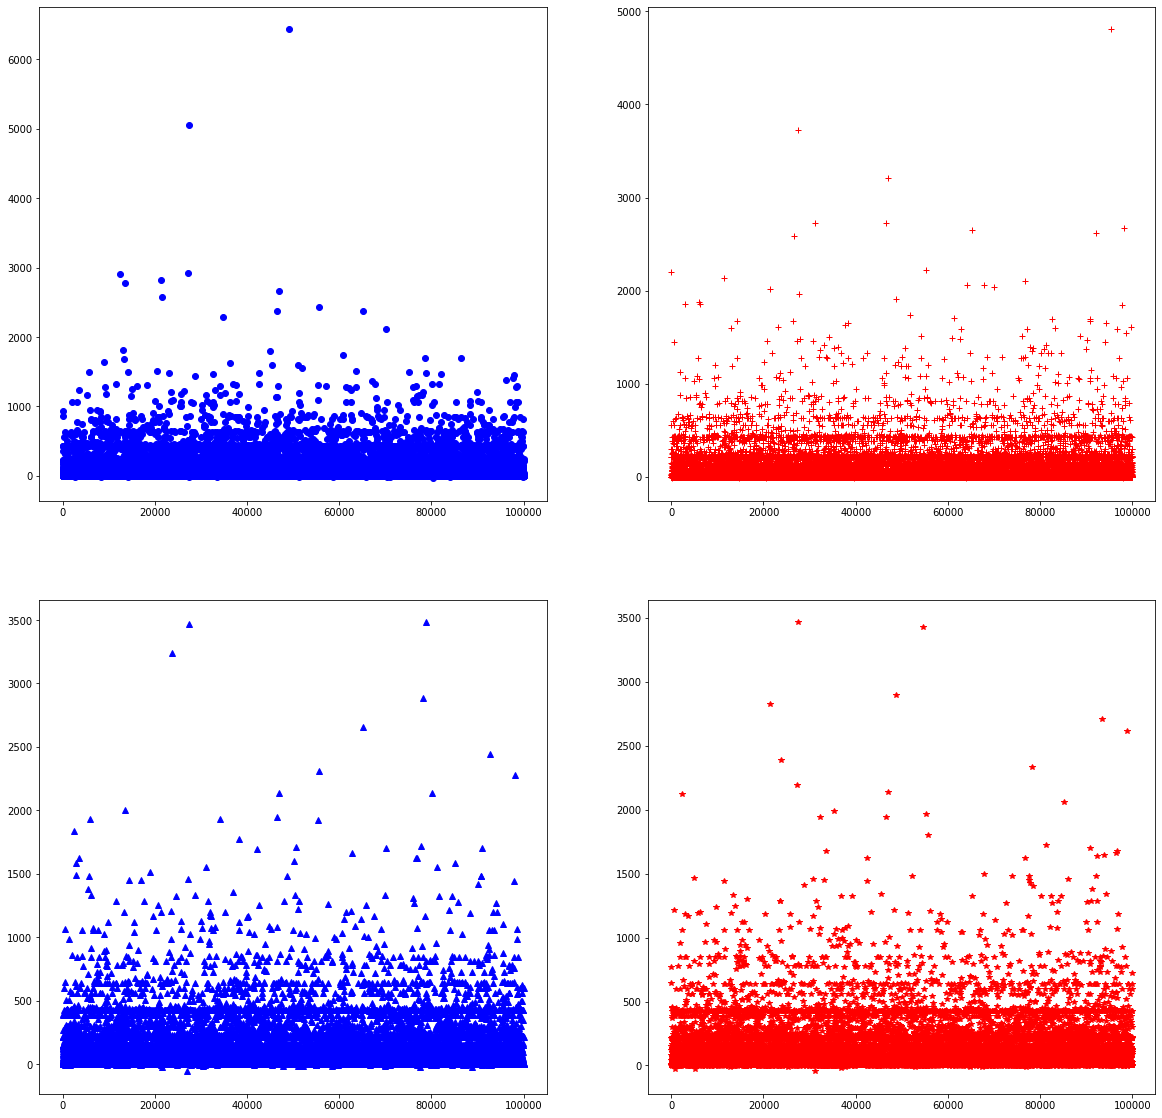

In [68]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['arpu_2g_6'],"bo")
ax2.plot(teleData['arpu_2g_7'],"r+")
ax3.plot(teleData['arpu_2g_8'],"b^")
ax4.plot(teleData['arpu_2g_9'],"r*")

plt.show()

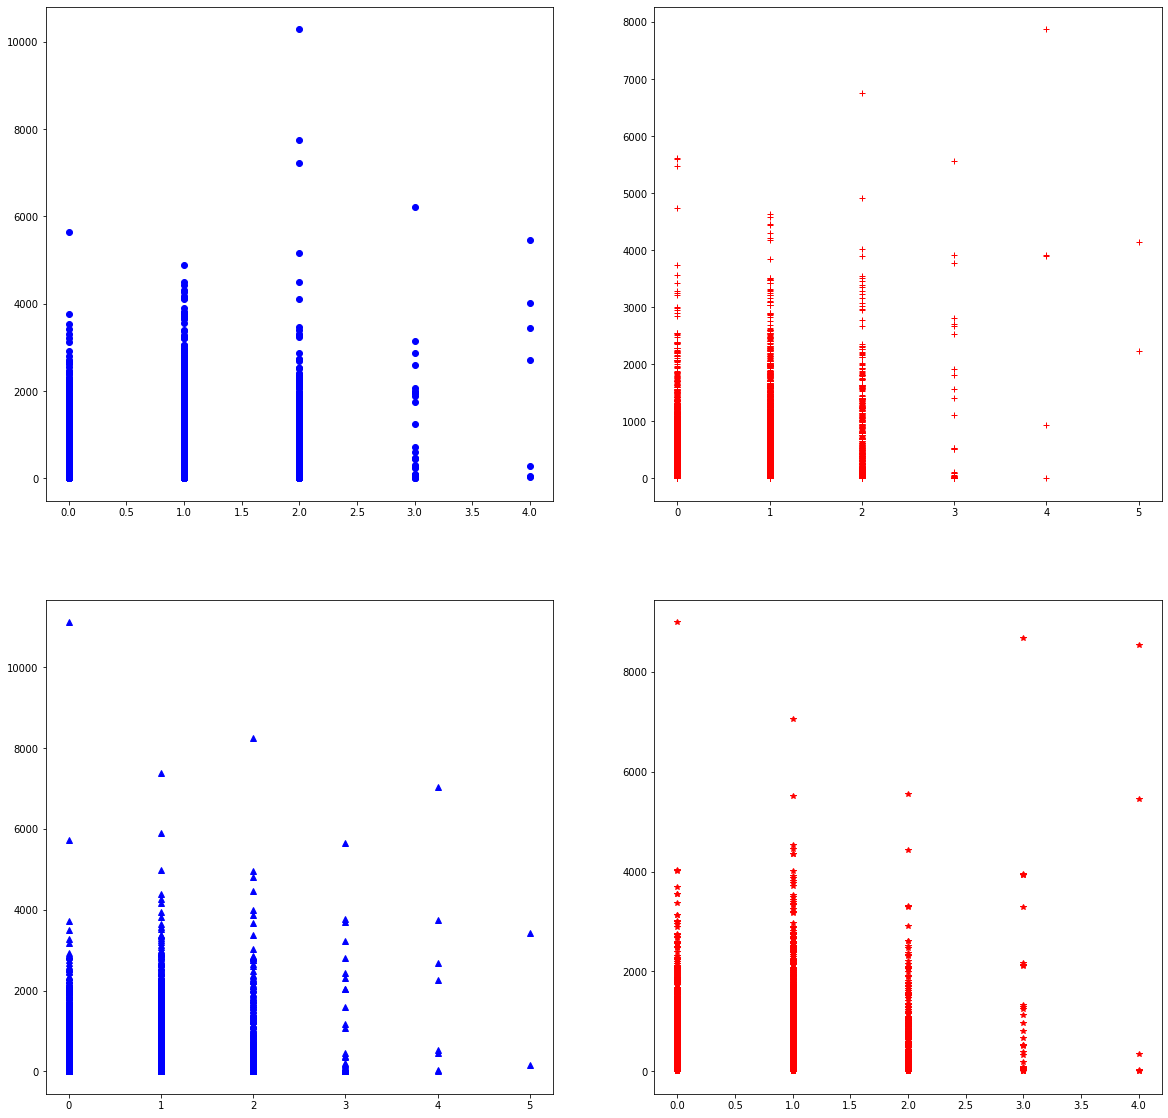

In [69]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['monthly_2g_6'],teleData['vol_2g_mb_6'],"bo")
ax2.plot(teleData['monthly_2g_7'],teleData['vol_2g_mb_7'],"r+")
ax3.plot(teleData['monthly_2g_8'],teleData['vol_2g_mb_8'],"b^")
ax4.plot(teleData['monthly_2g_9'],teleData['vol_2g_mb_9'],"r*")

plt.show()

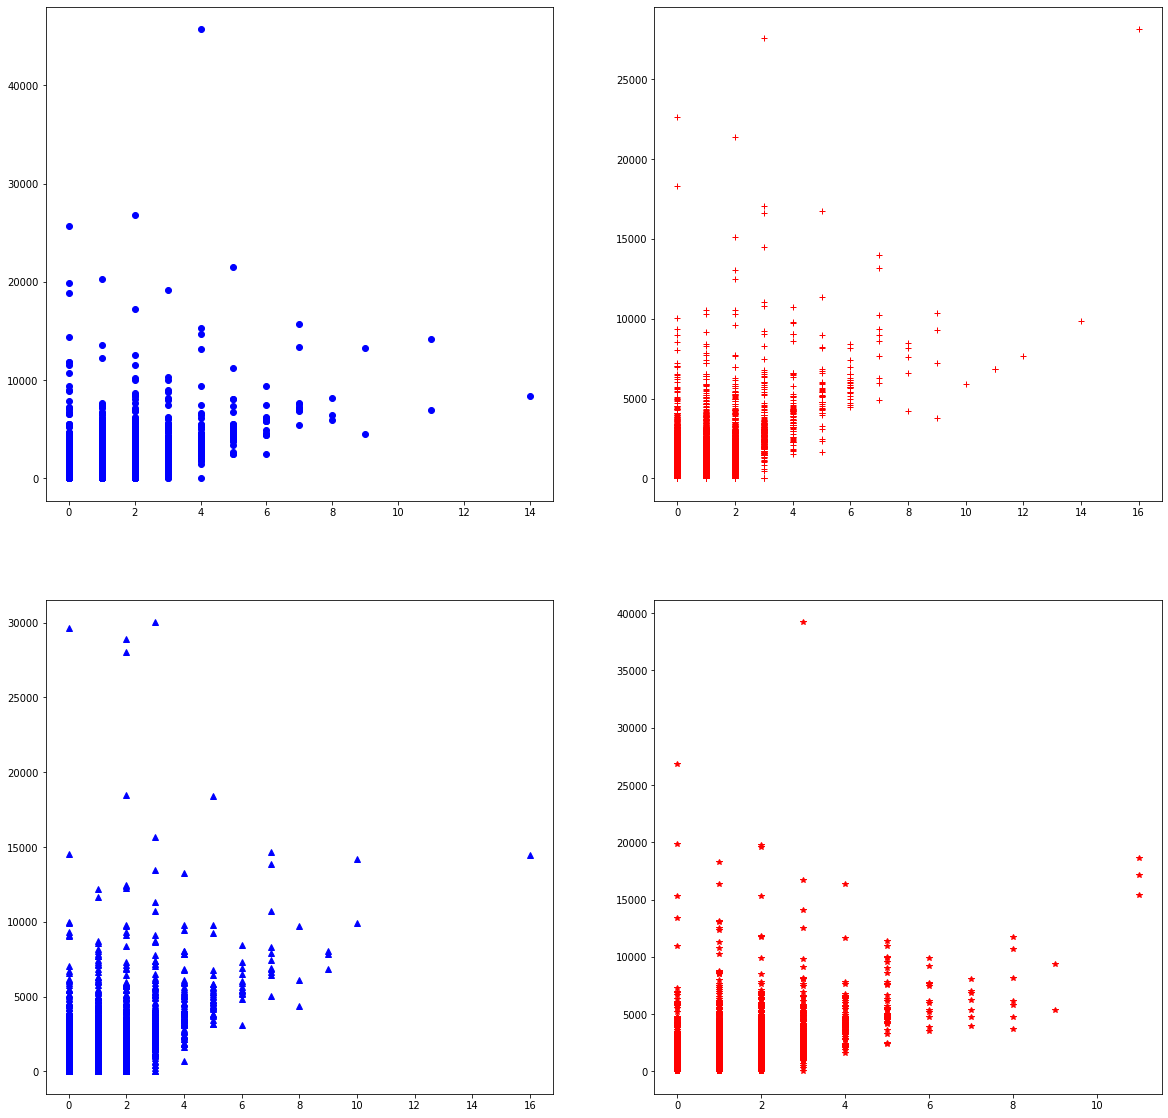

In [70]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['monthly_3g_6'],teleData['vol_3g_mb_6'],"bo")
ax2.plot(teleData['monthly_3g_7'],teleData['vol_3g_mb_7'],"r+")
ax3.plot(teleData['monthly_3g_8'],teleData['vol_3g_mb_8'],"b^")
ax4.plot(teleData['monthly_3g_9'],teleData['vol_3g_mb_9'],"r*")

plt.show()

## Data Imputation

## Outlier Treatment

## Feature Engineering

In [ ]:
correlationMatrix=teleData_HighValuesCustomers_Final.corr()

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(correlationMatrix)

In [ ]:
print(correlationMatrix.max())
print(correlationMatrix.min() )

In [71]:
plt.figure(figsize=(20, 12))
#plt.subplot(321)
sns.boxplot(x = 'arpu_6', y = 'churned_tag', data = teleData_HighValuesCustomers_Final)
plt.show()

NameError: name 'teleData_HighValuesCustomers_Final' is not defined

<Figure size 1440x864 with 0 Axes>

# Data Preperation

Finding the high values customers:
1. Creating a new columns that has average of the revenues of 6th and 7th month
2. Finding the 70th percentile and above.
3. Filtering the data to get the High Valued customers


As we can see that all the Average Revenue Columns have no null values, we can proceed forward with finding the Average
1. arpu_6        ---              99999 non-null float64
2. arpu_7        ---              99999 non-null float64
3. arpu_8        ---              99999 non-null float64
4. arpu_9        ---              99999 non-null float64

In [ ]:
teleData['avg_6_7_revenue']=(teleData["arpu_6"]+teleData["arpu_7"])/2

In [ ]:
percentile70th= teleData['avg_6_7_revenue'].quantile(0.70)
print("The 70th percentile average revenue is "+ str(percentile70th))

In [ ]:
teleData_HighValuesCustomers= teleData[teleData['avg_6_7_revenue']>=percentile70th]
teleData_HighValuesCustomers.shape

Taking a look into the High Valued customers dataset:

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_HighValuesCustomers.head(10))

Now making all Null values 0.

In [ ]:
teleData_HighValuesCustomers_Treated=teleData_HighValuesCustomers.fillna(0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(teleData_HighValuesCustomers_Treated.info(verbose=True,null_counts =True))

We can see that all the null values have been treated.
Thus teleData_HighValuesCustomers_Treated is our dataset that contains the high valued customer with treated data.
The next step is to tag the numbers as churned(1) and not churned(0)based on the following columns:
1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9

In [ ]:
filter=((teleData_HighValuesCustomers_Treated['total_ic_mou_9']==0)&(teleData_HighValuesCustomers_Treated['vol_2g_mb_9']==0)&(teleData_HighValuesCustomers_Treated['vol_3g_mb_9']==0)&(teleData_HighValuesCustomers_Treated['total_og_mou_9']==0))
teleData_HighValuesCustomers_Treated['churned_tag']=np.where(filter, 1, 0)
teleData_HighValuesCustomers_Treated['churned_tag'].sum()


In [ ]:
#filter=((teleData_HighValuesCustomers_Treated['total_ic_mou_9']==0)&(teleData_HighValuesCustomers_Treated['vol_2g_mb_9']==0)&(teleData_HighValuesCustomers_Treated['vol_3g_mb_9']==0)&(teleData_HighValuesCustomers_Treated['total_og_mou_9']==0))
#tagged=teleData_HighValuesCustomers_Treated.ix[filter,list(teleData_HighValuesCustomers_Treated.columns)]
#display(tagged.index)

In [ ]:
teleData_HighValuesCustomers_Treated.head(5)

Now we can see that the rows have a churned indicator against them.
We can delete all the columns that are related to the churn phase i.e. the '_9' columns

Removing all columns that have '_9' in them.

In [ ]:
print(len([x for x in teleData_HighValuesCustomers_Treated.columns if '_9' in x]))
print(len(teleData_HighValuesCustomers_Treated.columns))
teleData_HighValuesCustomers_Treated.shape

In [ ]:
colsToDrop=[x for x in teleData_HighValuesCustomers_Treated.columns if '_9' in x]

In [ ]:
teleData_HighValuesCustomers_Tagged=teleData_HighValuesCustomers_Treated.drop(colsToDrop,axis=1)

In [ ]:
teleData_HighValuesCustomers_Tagged.shape

Now we have removed all the columns that are related to the churn phase.
Lets have a look at the dataset now.

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_HighValuesCustomers_Tagged.head(5))

We might not need the date columns, so removing them as well.

creating a new dataset _naDates 

In [ ]:
teleData_HighValuesCustomers_naDates=teleData_HighValuesCustomers_Tagged.drop([x for x in teleData_HighValuesCustomers_Tagged.columns if 'date' in x],axis=1)
teleData_HighValuesCustomers_naDates.shape

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_HighValuesCustomers_naDates.head(5))

Now lets see what are the values in the columns, we will not need the columns that have single values so we will drop them

In [ ]:
for col in list(teleData_HighValuesCustomers_naDates.columns):
    if(teleData_HighValuesCustomers_naDates[col].nunique()>100 ): continue
    else:
        print(col+":"+str(teleData_HighValuesCustomers_naDates[col].unique().tolist()))
        print("----------------------------------------------------------------------------------")

In [ ]:
singleValuedColumnsDict={}
for col in list(teleData_HighValuesCustomers_naDates.columns):
    if(teleData_HighValuesCustomers_naDates[col].nunique()==1 ):
        singleValuedColumnsDict[col]=teleData_HighValuesCustomers_naDates[col].unique().tolist()[0]
print(singleValuedColumnsDict)

Dropping these columns

In [ ]:
teleData_HighValuesCustomers_Final= teleData_HighValuesCustomers_naDates.drop(list(singleValuedColumnsDict.keys()),axis=1)
teleData_HighValuesCustomers_Final.shape

# PCA

In [ ]:
pca_churn = PCA(0.95)

In [ ]:
df_train_pca = pca_again.fit_transform(X_train)
df_train_pca.shape